# Introduction to machine learning

*Maxime Sangnier*

October, 2017

## Practical session 6: DBSCAN and model selection for clustering

# Table of contents
1. [The elbow method and the silhouette coefficient](#part1)
1. [Model selection for spectral clustering](#part2)


# The elbow method and the silhouette coefficient <a id="part1"></a>


In [3]:
from mllab import *

In [4]:
from sklearn.datasets import make_blobs, make_moons

blobs = make_blobs(n_samples=300, centers=10, cluster_std=0.7)[0]
moons1 = make_moons(n_samples=100, noise=0.05)[0]*3
moons1[:, 0] += 15
moons2 = make_moons(n_samples=100, noise=0.05)[0]*3
moons2[:, 1] -= 15
noise = np.random.rand(20, 2) * 30 - 15

X = np.concatenate((blobs,moons1, moons2, noise))

>Provide an [agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) of the data matrix $X$ with 14 clusters.
Plot this clustering with the function defined above.

In [ ]:
# Answer

>Write a function `intraclass_inertia(X, y)`, that, given a data matrix $X$ and a vector of labels $y$ (the clustering), computes the empirical intraclass inertia.

In [ ]:
# Answer

>Still for an [agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) technique, draw (on the same picture and with an adequate rescaling) the intraclass inertia and the [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) with respect to the number of clusters.

>Are these two curves consistent (think of the elbow method)?

In [ ]:
# Answer

>Write a script, that finds (and prints) the best number of clusters based on the [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

>Plot the resulting clustering.
Is it satisfactory?

In [ ]:
# Answer

>By making $\epsilon$ change in [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), draw (on the same picture and with an adequate rescaling) the intraclass inertia and the [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) with respect to the number of clusters.

>Are these two curves consistent (think of the elbow method)?

In [ ]:
# Answer

>Write a script, that finds (and prints) the best number of clusters along with the best value of $\epsilon$ based on the [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

>Plot the resulting clustering.
Add noisy points in black.
Is it satisfactory?

In [ ]:
# Answer

>How many noisy points are there?

In [ ]:
# Answer

# Model selection for spectral clustering <a id="part2"></a>


>Given the following dataset and the function for extracting the affinity matrix and the Laplacian matrices, highlight the gap heuristic of [spectral clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) in order to choose the number of clusters.
For this purpose, plot the first eigenvalues (let say $\frac n5$, where $n$ is the sample size) of the Laplacian matrices for a nearest neighbor and a Gaussian similarity graph.

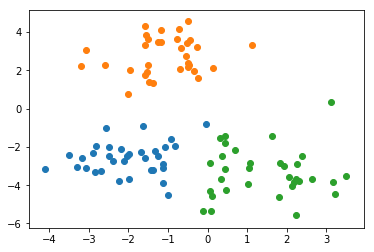

In [11]:
# Dataset
X, y = make_blobs()
plotXY(X, y, legend=False)

In [12]:
from scipy.sparse.csr import csr_matrix

def compute_laplacians(clt):
    """Extract the affinity matrix W from the spectral clustering object clt and returns
    (W, L, Ls, Lw), where, given the degree matrix D:
    - L = D-W is the unnormalized Laplacian of the graph defined by the affinity matrix W.
    - Ls = D^{-1/2}WD^{-1/2} is the normalized Laplacian of the graph (Version 1).
    - Lw = D^{-1}W is the normalized Laplacian of the graph (Version 2).
    """
    if type(clt.affinity_matrix_) is csr_matrix:
        W = np.asarray(clt.affinity_matrix_.todense())
    else:
        W = clt.affinity_matrix_
    
    D = np.diag(np.sum(W, axis=0))  # Degree matrix
    Dinv = np.diag(1/np.diag(D))  # Inverse of the degree matrix
    
    L = D - W  # Unnormalized Laplacian
    Ls = np.sqrt(Dinv).dot(L.dot(np.sqrt(Dinv)))  # Normalized Laplacian (Version 1)
    Lw = Dinv.dot(L)  # Normalized Laplacian (Version 2)
    return W, L, Ls, Lw

In [ ]:
# Answer

>Compare the eigenvalues of $L_s$ and $L_w$.
What can you conclude?

In [ ]:
# Answer

**Answer:**
…